In [9]:
# %load ipython_header.py
%run ico_seq_tools.py
%load_ext autoreload
%autoreload 2
%matplotlib notebook
# %matplotlib 
# plt.ioff()
#%matplotlib inline

what computer are you on? a = Bens, b = gpucluster, c = other   a
rna_seq base directory is C:\Users\BMH_work\github\expression_broad_data
I am about to import a library
are you online? Yes/NoYes
loaded ico_seq_tools.py
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# # Load raw data, process, save as .csv  Only need to do once. 
mincounts = 1
thresh_genes = 500
M = 300
lowcount_thresh = 3
scale_factor = 'median'

ARO4_high_exp_genes, ARO4_high_exp_genes_norm, ARO4_high_exp_genes_norm_log10, scale_factor = load_process_ARO4_data(mincounts, thresh_genes, M, lowcount_thresh, scale_factor)
    
# ARO4_high_exp_genes_norm_log10.to_csv(data_processing_dir + 'ARO4_high_exp_genes_norm_log10.csv')
# ARO4_high_exp_genes_norm.to_csv(data_processing_dir + 'ARO4_high_exp_genes_norm.csv')

# #Load single colony data

# ARO4_high_exp_genes_norm_log10 = pd.read_csv(data_processing_dir + 'ARO4_high_exp_genes_norm_log10.csv', index_col = 0)
# ARO4_high_exp_genes_norm = pd.read_csv(data_processing_dir + 'ARO4_high_exp_genes_norm.csv', index_col=0)


Selecting colonies containing data for at least 500 genes with at least 1 count
Selecting genes that have at least 3 counts in one of the smallest 300 colonies
Normalizing colonies by total counts
adding psuedocount of 0.0089


In [3]:
# #Initial attempt to average ICO seq data: first average of normalized/log count values from individual colonies. 
# # Load raw data, process, save as .csv  Only need to do once. 

# ARO4_lib_data = pd.read_table(data_processing_dir + "out_gene_exon_tagged_2000.dge.txt")
# ARO4_lib_data.set_index('GENE', inplace = True)

# #Update gene names to current SGD names
# ico_seq_synonyms = pd.read_csv(data_processing_dir + "ICO_seq_common_name_mismatches.csv")
# ico_seq_synonyms_dict = dict(zip(ico_seq_synonyms['input'],ico_seq_synonyms['symbol']))
# ARO4_lib_data.rename(index =ico_seq_synonyms_dict, inplace = True)

# #1. Select only colonies containing at least 500 genes that have at least 1 count.  This brings the total number
# #   of colonies down to 1642


# mincounts = 1 
# ngenes = []
# thresh_genes = 500
# print('Selecting colonies containing data for at least {0:d} genes with at least {1:d} count'.format(thresh_genes, mincounts))


# cells_above_thresh = []
# for cell in ARO4_lib_data.columns:
#     ngenes_gt_mincounts = len(ARO4_lib_data[cell][ARO4_lib_data[cell]>=mincounts])
#     ngenes.append(ngenes_gt_mincounts)
#     if ngenes_gt_mincounts >=500: 
#         cells_above_thresh.append(cell)

# ARO4_lib_data_mincount = ARO4_lib_data.loc[:,cells_above_thresh]


# #2. Analyze only genes that have at least N=3 counts in one of the smallest M=300 colonies (as determined by total number of reads)
# #   This leaves 1064 genes.  
# M = 300
# lowcount_thresh = 3

# print('Selecting genes that have at least {0:d} counts in one of the smallest {1:d} colonies'.format(lowcount_thresh, M))

# #Add a row for total counts and sort descending by that row. 
# ARO4_lib_data_mincount_total = ARO4_lib_data_mincount.sum()
# ARO4_lib_data_mincount_total.name = 'total_counts'
# ARO4_lib_data_mincount = ARO4_lib_data_mincount.append(ARO4_lib_data_mincount_total)
# ARO4_lib_data_mincount.sort_values(by='total_counts', axis = 1, ascending = False, inplace=True)
# ARO4_lib_data_mincount_genes = ARO4_lib_data_mincount.drop('total_counts')

# ARO4_high_exp_genes = ARO4_lib_data_mincount_genes[ARO4_lib_data_mincount_genes.iloc[:, -M:].max(axis = 1)>=lowcount_thresh]

# # 3. Take average for all genes - sum up counts for all colonies, divide by total number of colonies
# print('Making average of all counts')
# ARO4_high_exp_genes_avg = ARO4_high_exp_genes.sum(axis = 1)/ARO4_high_exp_genes.shape[1]

# #4. Normalize by total counts, scale by 10K (the total for the average is about 3300 counts) 
# print('Normalizing average by total counts')

# #Normalize by total counts, and multipy by median of all counts to ensure scale is close to 
# #original counts scale. 
# ARO4_high_exp_genes_avg_norm = ARO4_high_exp_genes_avg.copy()
# N_scale = 10000
# ARO4_high_exp_genes_avg_norm = ARO4_high_exp_genes_avg_norm/sum(ARO4_high_exp_genes_avg)*N_scale

# # #sort genes by summed expression
# # ARO4_high_exp_genes_norm['gene_totals'] = ARO4_high_exp_genes_norm.sum(axis=1)
# # ARO4_high_exp_genes_norm.sort_values('gene_totals',ascending=False, inplace=True)
# # ARO4_high_exp_genes_norm.drop('gene_totals',axis=1, inplace = True)

# #5. Add a pseudocount. I use 0.1*sum(ARO4_high_exp_genes_avg)*N_scale so that zero counts from the average would be mapped to -1 on a log scale
# pseudocount = 0.1/sum(ARO4_high_exp_genes_avg)*N_scale
# print('adding psuedocount of {:0.4f}'.format(pseudocount))
# ARO4_high_exp_genes_avg_norm = ARO4_high_exp_genes_avg_norm + pseudocount
# ARO4_high_exp_genes_avg_norm_log10 = np.log10(ARO4_high_exp_genes_avg_norm)

# # ARO4_high_exp_genes_norm_log10.to_csv(data_processing_dir + 'ARO4_high_exp_genes_norm_log10.csv')
# # ARO4_high_exp_genes_norm.to_csv(data_processing_dir + 'ARO4_high_exp_genes_norm.csv')


Selecting colonies containing data for at least 500 genes with at least 1 count
Selecting genes that have at least 3 counts in one of the smallest 300 colonies
Making average of all counts
Normalizing average by total counts
adding psuedocount of 0.3016


In [13]:
#Create Average ico_seq datagiven the high exp_genes set and N_scale: 

ARO4_high_exp_genes_avg_norm, ARO4_high_exp_genes_avg_norm_log10 = average_ico_seq_data(ARO4_high_exp_genes, scale_factor)


Making average of all counts
Normalizing average by total counts
adding psuedocount of 0.0712


In [14]:
#Loading bulk data
#Note: changed filenames to have consistent pattern, 
#replaced CR (\r) with LF (\n), 
#removed all spaces (there were spaces in front of all gene names)

#Load and process bulk data
bulk_data_ARO4_subset_norm, bulk_data_ARO4_subset_norm_log10 = process_bulk_seq_data(ARO4_high_exp_genes_avg_norm_log10.index, scale_factor, data_processing_dir)


Normalizing bulk data by total counts
adding psuedocount of 0.0001


In [92]:
# Before summing exons, the bulk data had a number of duplicate entries
# This generates a list of duplicated genes from bulk data

# Requires bulk_data which is loaded internally in process_bulk_seq_data

# index_count = Counter(bulk_data.index)
# dupes = []
# for item, count in index_count.items():
#     if count >= 2:
#         if count>2: 
#             print(item + ' count ' + str(count))
#         dupes.append(item)
# dupes
        

SUS1 count 3
VMA9 count 3
HMRA1 count 3
DYN2 count 3
AI5_ALPHA count 5
AI3 count 3
AI4 count 4
COX1 count 8
COB count 6
BI4 count 4
BI3 count 3
Q0255 count 3
YOS1 count 3
RPL7A count 3
YGR001C count 3
RDN37-1 count 3
RDN37-2 count 3
TAD3 count 3
RPL7B count 3


['SNC1',
 'TRN1',
 'EFB1',
 'TFC3',
 'SUP56',
 'YBL111C',
 'YBL100W-B',
 'tF(GAA)B',
 'SCS22',
 'RPL23A',
 'CMC2',
 'YBL059W',
 'SEC17',
 'ERD2',
 'RPL19B',
 'LSM2',
 'POP8',
 'YBL005W-B',
 'YBR012W-B',
 'RPS11B',
 'YBR062C',
 'ECM33',
 'UBC4',
 'RPL19A',
 'YBR090C',
 'SUS1',
 'MUD1',
 'RPS6B',
 'PCH2',
 'RPS9B',
 'RPL21A',
 'HPC2',
 'YBR219C',
 'OM14',
 'YBR255C-A',
 'YCL019W',
 'SUP53',
 'YCL012C',
 'VMA9',
 'YCL002C',
 'RIM1',
 'RPS14A',
 'SUP61',
 'HMRA1',
 'DTD1',
 'RPL35A',
 'RPL35B',
 'RPP1B',
 'HNT1',
 'IWR1',
 'KIN28',
 'RPS16B',
 'RPL13A',
 'MRK1',
 'RPL31A',
 'UBC9',
 'tK(UUU)D',
 'ARP2',
 'YDL012C',
 'MAF1',
 'RPS11A',
 'YDR034C-D',
 'UBC5',
 'RPS13',
 'UBC13',
 'YDR098C-B',
 'SAC6',
 'RUB1',
 'YDR210W-B',
 'YDR210C-D',
 'tI(UAU)D',
 'SUP2',
 'YDR261W-B',
 'YDR261C-D',
 'HNT2',
 'tF(GAA)D',
 'YDR316W-B',
 'MCM21',
 'YDR365W-B',
 'KEI1',
 'YRA1',
 'YDR381C-A',
 'NCB2',
 'DYN2',
 'RPS17B',
 'RPS18A',
 'RPL27B',
 'RPL37B',
 'tL(CAA)D',
 'YDR535C',
 'YIL177C',
 'YIL156W-B',
 'R

In [22]:
#Merge ico_avg and bulk data
bulk_data_ico_avg = bulk_data_ARO4_subset_norm_log10.merge(
    pd.DataFrame(ARO4_high_exp_genes_avg_norm_log10, columns=['ico_seq_avg']),
    how='inner', left_index =True, right_index=True
)
bulk_data_ico_avg['colony'] = bulk_data_ico_avg.loc[:,['colony1','colony2']].mean(axis=1)

In [24]:
#load cluster data: 
fname_clusters = data_processing_dir  + 'clusters.pkl'
with open(fname_clusters,'rb') as f: 
    clusters = pickle.load(f)
    
#for each cluster, make average expression dataset

for cluster_name, cluster in clusters.items():
    ico_data_subset = ARO4_high_exp_genes.loc[:,cluster]
    ico_data_subset_avg_norm, ico_data_subset_avg_norm_log10 = average_ico_seq_data(ico_data_subset, scale_factor)
    bulk_data_ico_avg[cluster_name] = ico_data_subset_avg_norm_log10


Making average of all counts
Normalizing average by total counts
adding psuedocount of 0.0927
Making average of all counts
Normalizing average by total counts
adding psuedocount of 0.1092
Making average of all counts
Normalizing average by total counts
adding psuedocount of 0.0579


<IPython.core.display.Javascript object>


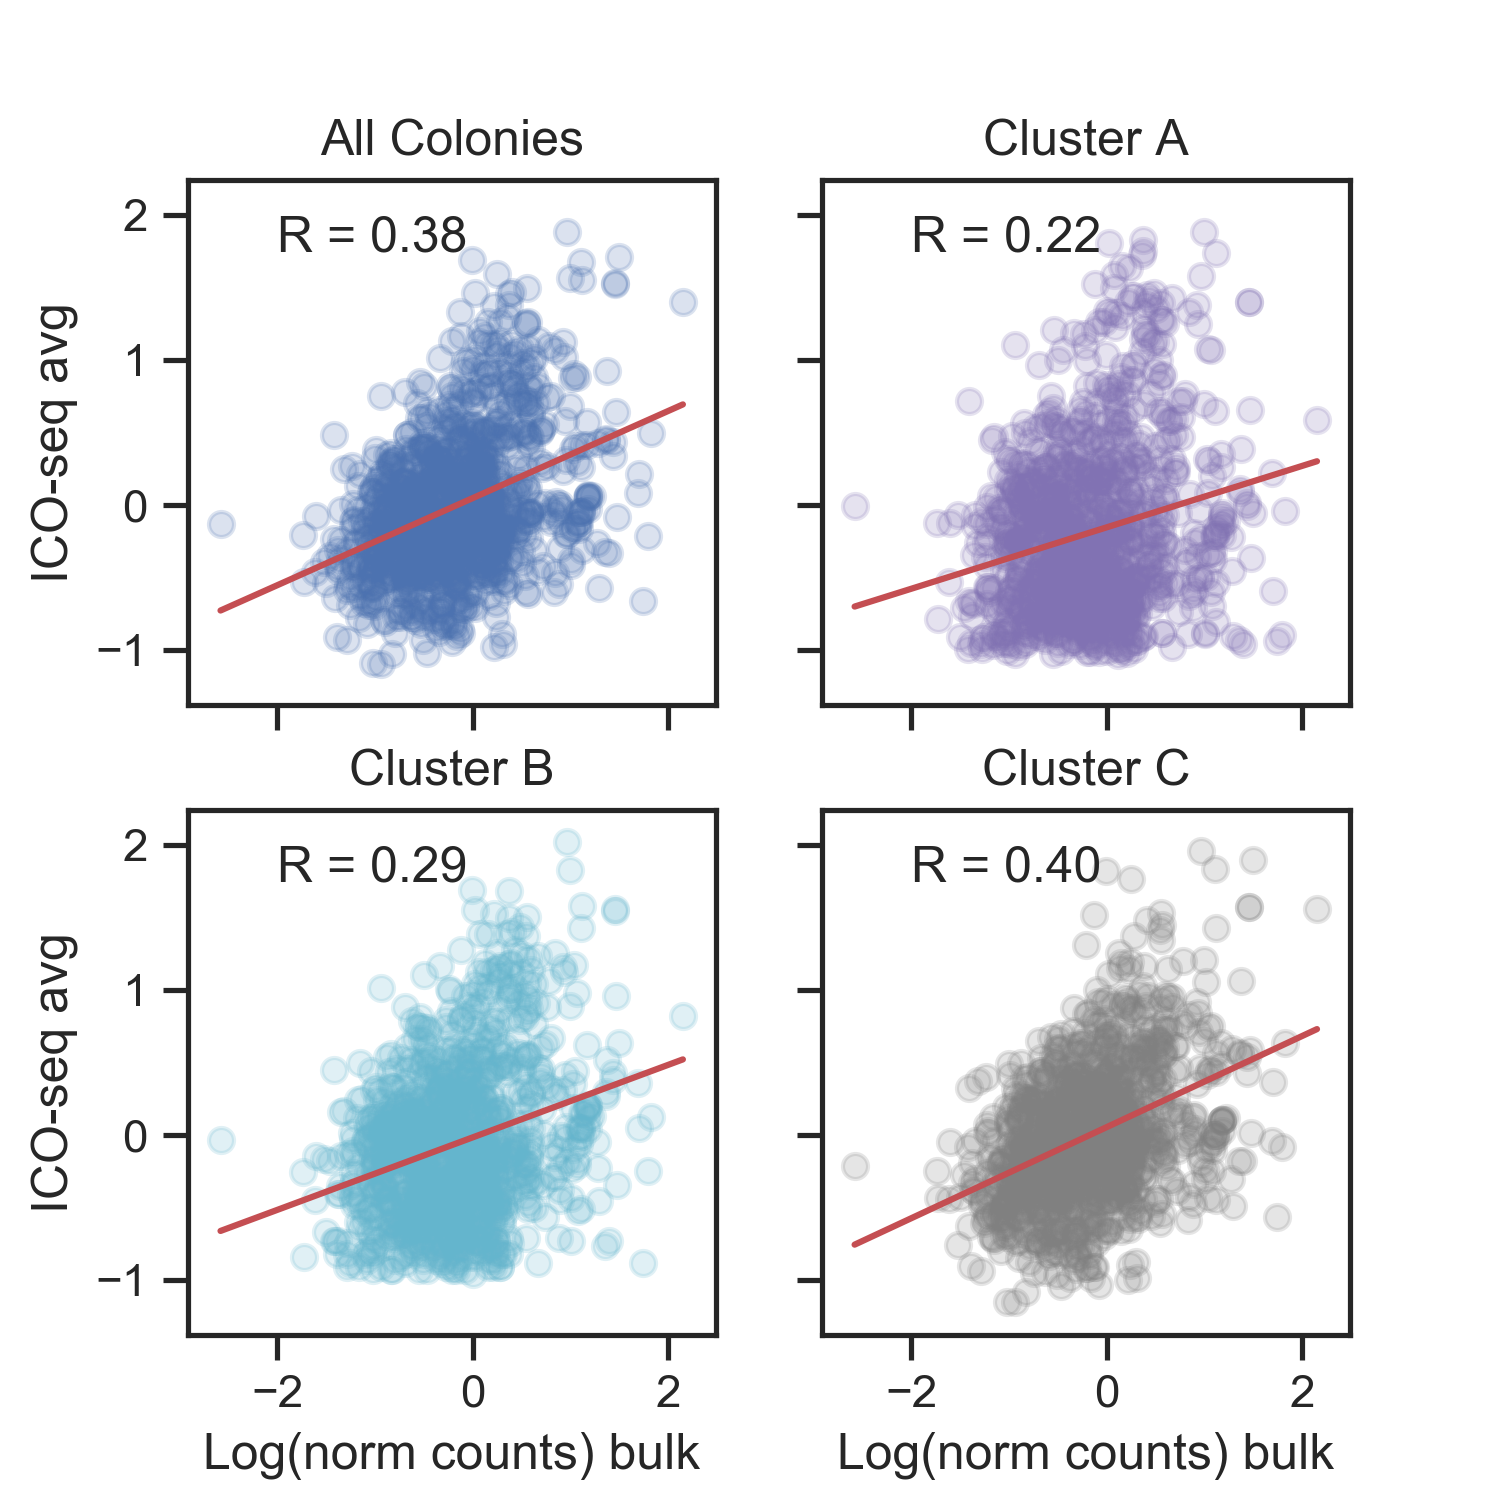

In [31]:

#Plot Bulk Data and Average Expression broken down by WT/PKA inhibition as well as by cluster

fig, axarr = plt.subplots(2,2,sharex = True, sharey = True, figsize=(5,5))

#clusters loaded above
#clusters = {'Cluster A': cluster_A, 'Cluster B':cluster_B, 'Cluster C':cluster_C}
colors = {'Cluster A': 'm', 'Cluster B': 'c', 'Cluster C': 'gray'}
conditions = {'Colony': "colony", 'Culture': "culture" }
#condition_column = {'Colony':0, 'Culture': 1}

minx = min(bulk_data_ico_avg['colony']) 
maxx = max(bulk_data_ico_avg['colony'])

yvalues = bulk_data_ico_avg['ico_seq_avg']

condition = 'Colony'#for condition, condition_label in conditions.items(): 
condition_label = conditions[condition]


jj = 0
xvalues = bulk_data_ico_avg[condition_label]
ax = axarr.flatten()[jj]
ax.scatter(xvalues, yvalues, alpha=0.2)
slope, intercept, r_value, p_value, std_err = stats.linregress(xvalues, yvalues)
line_xvals = np.linspace(minx,maxx, num=4)
line_yvals = intercept + slope*line_xvals
#ax.set_xlabel('Log(normalized counts), bulk data')
ax.plot(line_xvals, line_yvals, 'r')
ax.set_title('All Colonies')
ax.text(-2, 1.75, 'R = {:.2f}'.format(r_value))
ax.set_ylabel('ICO-seq avg')

jj = jj+1
for cluster_name in ['Cluster A', 'Cluster B', 'Cluster C']:
    yvalues =  bulk_data_ico_avg[cluster_name]
    xvalues =  bulk_data_ico_avg[condition_label]
    ax = axarr.flatten()[jj]
    ax.scatter(xvalues, yvalues, alpha=0.2, color = colors[cluster_name])
    slope, intercept, r_value, p_value, std_err = stats.linregress(xvalues, yvalues)
    line_xvals = np.linspace(minx,maxx, num=4)
    line_yvals = intercept + slope*line_xvals
    ax.plot(line_xvals, line_yvals, 'r')
    ax.text(-2, 1.75, 'R = {:.2f}'.format(r_value))
    ax.set_title(cluster_name)
    if jj in {2,3}:
        ax.set_xlabel('Log(norm counts) bulk')
    if jj == 2: 
        ax.set_ylabel('ICO-seq avg')
    jj = jj+1
        
plt.savefig(os.path.normpath(base_dir + os.sep + "analysis" + os.sep + "20190321_ico_vs_colony.pdf" ))

Supplementary Figure 1. Comparison of ICO seq data and bulk sequencing data collected from colonies.  Bulk sequencing data was collected two colonies of BY4741 p413ARO4 yeast cells grown in (?? media) for (??time). After RNA extraction (using ??) and library preparation (??) samples were sequenced using a Miseq (??) [alternatively could just reference methods]. Raw read data was aligned to the S.Cerevisiae genome [which build] and counts were generated [??using bowtie], and counts from all exons for a given gene were summed.  After filtering the dataset so that only genes analyzed for individual colonies were considered, counts were normalized and multiplied by the same scaling factor as was used for the individual colonies.  A pseudocount of (scaling factor)*0.1/(max no of total counts for each replicates) was added to the normalized counts prior to taking the log10 value.  This bulk data from yeast colonies on solid media is plotted on the X axis.  Average ICO-seq data for all colonies analyzed and grouped by cluster is plotted on On the Y axis.  Average data for the colonies was calculated by summing counts from all colonies and then normalizing, adding a pseudocount, and taking the log10 of the result.  The Pearson correlation coefficient was calculated and a best fit line is displayed.  



Note: scaling factor was the median of the total counts after filtering low expression genes.  


In [155]:
#Plotly comparison

data = []

conditions = {'colony': "colony", 'culture': "culture" }

for condition, condition_label in conditions.items():
    xvalues = bulk_data_ico_avg.loc[:,condition_label]
    yvalues = bulk_data_ico_avg['ico_seq_avg']

    trace = pygo.Scatter(
        x = list(xvalues), 
        y =  list(yvalues),
        text = bulk_data_ico_avg.index,
        mode = 'markers',
        marker = {'opacity': 0.5}, #, 
                  #'color': 'rgba'+str(cmap(NN/10))}, 
        name = condition
    )

    data.append(trace)


    layout = pygo.Layout(
        xaxis= {
            #"range":[-2, 20],
            "title":'Bulk data'
        },
        yaxis= {
            #"range":[-2, 20],
            "title":'Average expression'
        }, 
        width = 500, 
        height = 400
    )


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='ico_seq_colony_avg_log_vs_bulk_colony')

0.630944786864969
1.1373131621784405


Text(0,0.5,'ico_seq_avg_sum_first')

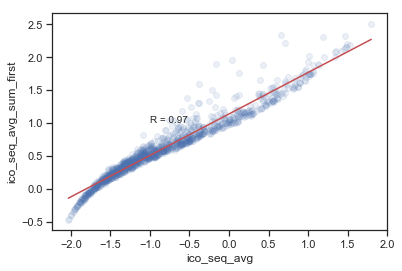

In [28]:
#Single Plot routine
fix, ax = plt.subplots()
xcond = 'ico_seq_avg'
ycond = 'ico_seq_avg_sum_first'
cond = 'WT' #'NMPP1'
xvalues =  bulk_data_ico_avg[xcond]
#xvalues =  bulk_data_ico_avg_old[cond + ' mean']
yvalues =  bulk_data_ico_avg[ycond]
slope, intercept, r_value, p_value, std_err = stats.linregress(xvalues, yvalues)
print(slope)
print(intercept)
ax.scatter(xvalues,yvalues, alpha = 0.1)
minx = min(xvalues)
maxx = max(xvalues)
line_xvals = np.linspace(minx,maxx, num=4)
line_yvals = intercept + slope*line_xvals
ax.plot(line_xvals, line_yvals, 'r')
ax.text(-1, 1.0, 'R = {:.2f}'.format(r_value))
ax.set_xlabel(xcond)
ax.set_ylabel(ycond)
#ax.set_ylabel('BMH ' + cond + ' culture')

## For response: Comparison between Colony data and ICO seq data

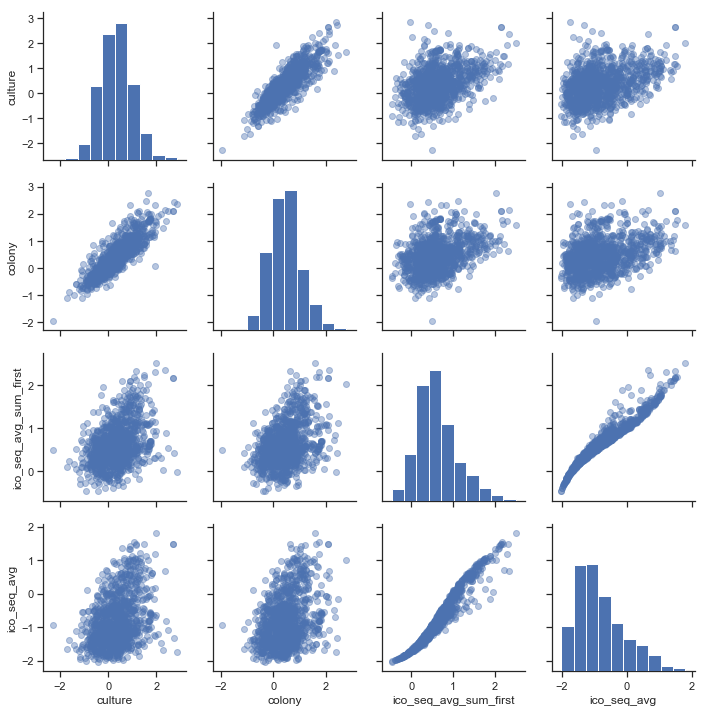

In [18]:
#comparison between sum first and avg after normalization and log now, I just use sum first. 

columns_to_view = ['culture','colony', 'ico_seq_avg_sum_first','ico_seq_avg']
g = sns.PairGrid(bulk_data_ico_avg.loc[:,columns_to_view])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, alpha = 0.4)

In [58]:
# Comparison with old bulk data
bulk_data_raw_counts = pd.read_csv(base_dir_rna_seq + os.sep + "expression_data" + os.sep + "20170817_klscpka" + os.sep + "20170817_klscpka_counts_all_SC.csv")
bulk_data_raw_YPD = bulk_data_raw_counts.loc[:,['0','7027','7028','7035','7036','7047','7048']]
bulk_data_raw_YPD.rename(columns = {'0':'sc_genename','7027': 'WT 1', '7035': 'WT 2', '7047':'WT 3', '7028':'NMPP1 1','7036':'NMPP1 2','7048':'NMPP1 3'},inplace='True')
bulk_data_raw_YPD.set_index('sc_genename',inplace=True)

#take out subset of genes that we are analyzing for the ICO seq dataset: 
bulk_data_ARO4_subset = bulk_data_raw_YPD.loc[set(io_library.SC_orf_lookup_by_name(ARO4_high_exp_genes_norm.index)) & set(bulk_data_raw_YPD.index),:]

#Normalize by total counts.  
#Multiply by the same factor we are using for all the ICO seq data
bulk_data_ARO4_subset_norm = bulk_data_ARO4_subset.copy()
bulk_data_ARO4_subset_sum = bulk_data_ARO4_subset.sum()
#med_ico = bulk_data_ARO4_subset_sum.median()
med = bulk_data_ARO4_subset_sum.median()
for col in bulk_data_ARO4_subset.columns:
    bulk_data_ARO4_subset_norm[col] = bulk_data_ARO4_subset[col]/bulk_data_ARO4_subset_sum[col]*med
    
#sort genes by summed expression
# ARO4_high_exp_genes_norm['gene_totals'] = ARO4_high_exp_genes_norm.sum(axis=1)
# ARO4_high_exp_genes_norm.sort_values('gene_totals',ascending=False, inplace=True)
# ARO4_high_exp_genes_norm.drop('gene_totals',axis=1, inplace = True)

pseudocount = 0.1/max(bulk_data_ARO4_subset_sum)*med   #I am using 0.1 times 1/the largest number of counts for a pseudocount (multiplied by the median number of counts so all is on the same scale) - thus the pseudocount is 0.1 * the smallest possible value for a single read. 
bulk_data_ARO4_subset_norm = bulk_data_ARO4_subset_norm + pseudocount
bulk_data_ARO4_subset_norm_log10 = np.log10(bulk_data_ARO4_subset_norm)

#make columns for mean for each condition and SC common name
bulk_data_ARO4_subset_norm_log10['SC_common_name'] = io_library.SC_common_name_lookup(bulk_data_ARO4_subset_norm_log10.index)
bulk_data_ARO4_subset_norm_log10['WT mean'] = bulk_data_ARO4_subset_norm_log10.loc[:,['WT 1', 'WT 2', 'WT 3']].mean(axis = 1)
bulk_data_ARO4_subset_norm_log10['WT var'] = bulk_data_ARO4_subset_norm_log10.loc[:,['WT 1', 'WT 2', 'WT 3']].var(axis = 1)
bulk_data_ARO4_subset_norm_log10['NMPP1 mean'] = bulk_data_ARO4_subset_norm_log10.loc[:,['NMPP1 1', 'NMPP1 2', 'NMPP1 3']].mean(axis = 1)
bulk_data_ARO4_subset_norm_log10['NMPP1 var'] = bulk_data_ARO4_subset_norm_log10.loc[:,['NMPP1 1', 'NMPP1 2', 'NMPP1 3']].var(axis = 1)



S.Cer orf for YNR034W-Anot found
S.Cer orf for 21S_rRNAnot found
S.Cer orf for YBR085C-Anot found
S.Cer orf for YFR032C-Bnot found
S.Cer orf for YDR034W-Bnot found
S.Cer orf for YER121Wnot found
S.Cer orf for YHR138Cnot found
S.Cer orf for YDR524C-Bnot found
S.Cer orf for YHR162Wnot found
S.Cer orf for YPR010C-Anot found
S.Cer orf for YLR257Wnot found
S.Cer orf for YPL225Wnot found
S.Cer orf for YOR052Cnot found
S.Cer orf for CRS5not found
S.Cer orf for YPR036W-Anot found
S.Cer orf for YKL065W-Anot found
S.Cer orf for YDR119W-Anot found
S.Cer orf for YMR074Cnot found
S.Cer orf for YKL063Cnot found
S.Cer orf for YOR020W-Anot found
S.Cer orf for YJR085Cnot found
S.Cer orf for YMR090Wnot found
S.Cer orf for YDR379C-Anot found
S.Cer orf for YOR019Wnot found
S.Cer orf for YJL127C-Bnot found
S.Cer orf for YGR182Cnot found
S.Cer orf for YGR035Cnot found
S.Cer orf for YGR161W-Cnot found
S.Cer orf for YIL156W-Bnot found
S.Cer orf for YDR115Wnot found
S.Cer orf for YOR289Wnot found
S.Cer orf for

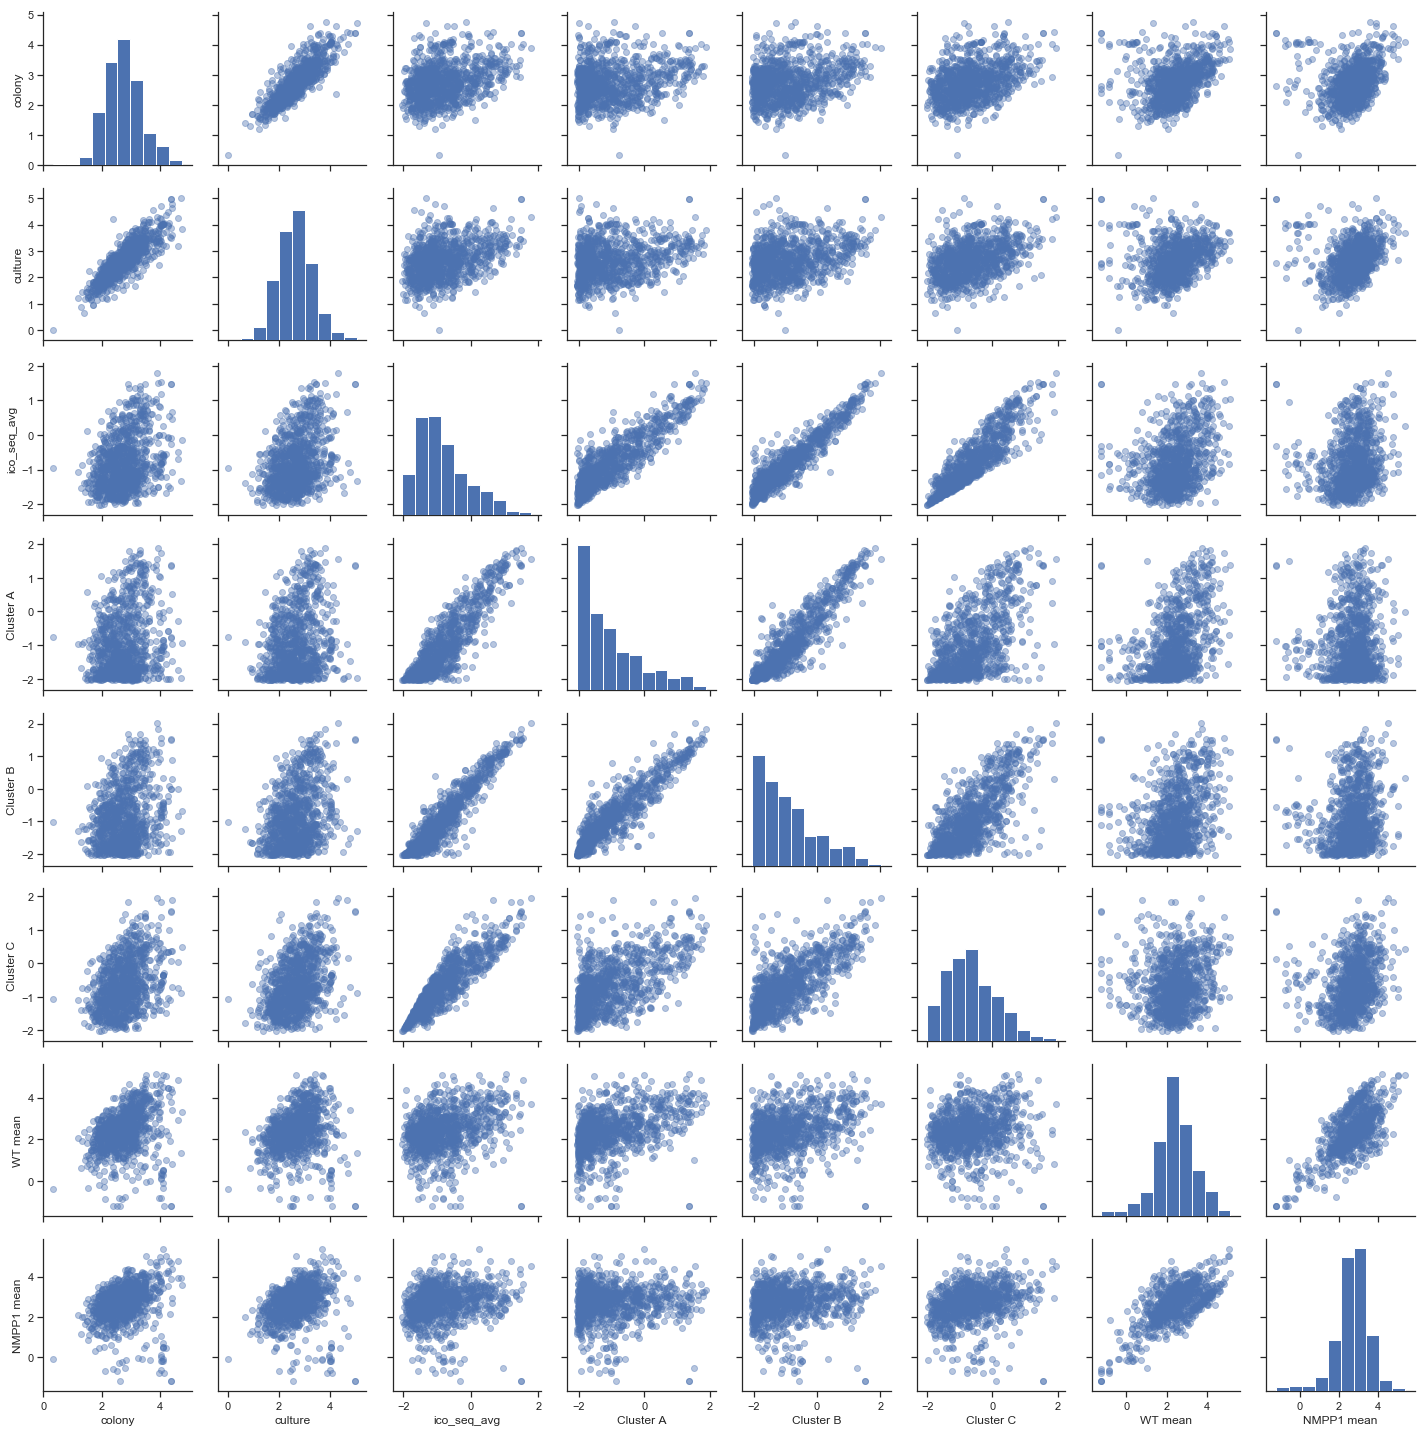

In [59]:
bulk_data_ico_avg_old = bulk_data_ico_avg.merge(bulk_data_ARO4_subset_norm_log10.loc[:,['SC_common_name', 'WT mean', 'NMPP1 mean']], how='inner', left_index=True, right_on='SC_common_name')
columns_to_view = ['colony','culture', 'ico_seq_avg', 'Cluster A',
       'Cluster B', 'Cluster C',  'WT mean', 'NMPP1 mean']
g = sns.PairGrid(bulk_data_ico_avg_old.loc[:,columns_to_view])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, alpha = 0.4)